#  Question 2 - Alex Bercik (1002128020) and Jaewon Yun (999243322)

In [1]:
# import necessary modules
import matplotlib.pyplot as plt 
import numpy as np
from numpy import linalg as la

In [2]:
# use LaTeX, set global settings for plots 
plt.rc('font', family='serif')
plt.rc('font', size=16)
plt.rc('legend', fontsize=16)
plt.rc('legend', frameon=True)
#plt.rc('xtick.major', pad=7)
#plt.rc('xtick.minor', pad=7)
plt.rc('text', usetex=True)
plt.rc('legend', numpoints=1)
#plt.rc('legend', handlelength=1.5)
#plt.rc('lines', lw=1.5)

# Part A

Here we will consider a 2-dimensional molecular system under the influence of only the Lennard-Jones potential given by
\begin{align}
V(r) &= 4 \Big[ \Big( \frac{1}{r} \Big) ^{12} - \Big( \frac{1}{r} \Big) ^6 \Big], & \text{where} \;\;\; r&=\sqrt{(x_1-x_2)^2 + (y_1-y_2)^2}
\end{align}
where we have simplified $\epsilon=1$ and $\sigma=1$. If we take this potential and assume it to be the only force of attraction between the molecules, we can directly calculate the forces (and hence accelerations) on the particles. This will allow us to evolve and study the system. Before we can calculate the forces, we must note that this potential specifies the $\bf{total}$ potential between the two particles, and hence the resulting force on each must be divided by 2. Furthermore to make calculations simpler, we will assume $m_1 = m_2 = 1$.

\begin{align}
\mathbf{F_1} &= \frac{-\nabla_1 V(r)}{2} = -\frac{1}{2} \begin{bmatrix} \frac{\partial}{\partial x_1} V(r) \\ \frac{\partial}{\partial y_1} V(r) \end{bmatrix} = \frac{-4}{2} \Big[ -12 \Big( \frac{1}{r} \Big) ^{13} + 6 \Big( \frac{1}{r} \Big) ^7 \Big] \frac{2}{2r} \begin{bmatrix} x_1 - x_2 \\ y_1 - y_2 \end{bmatrix} \\
&= \frac{12}{r} \Big[ 2 \Big( \frac{1}{r} \Big) ^{13} - \Big( \frac{1}{r} \Big) ^7 \Big] \mathbf{r}
\end{align}

We performed the above equation for $x_1$, but the same hold for $x_2$, we simply put an overal factor of $-1$ infront. We can therefore state our equations of motion as the following:

\begin{align}
\mathbf{a_1} &= \frac{\mathbf{F_1}}{m_1} = \mathbf{F_1} = \frac{12}{r} \Big[ 2 \Big( \frac{1}{r} \Big) ^{13} - \Big( \frac{1}{r} \Big) ^7 \Big] \mathbf{r} & \text{where} \;\;\; \mathbf{r} = \begin{bmatrix} x_1 - x_2 \\ y_1 - y_2 \end{bmatrix} \\
\mathbf{a_2} &= \frac{\mathbf{F_2}}{m_2} = -\mathbf{F_1} = -\frac{12}{r} \Big[ 2 \Big( \frac{1}{r} \Big) ^{13} - \Big( \frac{1}{r} \Big) ^7 \Big] \mathbf{r}
\end{align}

# Part B

Before we can write pseudocode, we must set up our system of equations. We will use the form $\frac{\text{d}^2\mathbf{r}}{\text{d}t^2} = \mathbf{f}(\mathbf{r},t)$ where $\mathbf{r} = (x_1, y_1, x_2, y_2)$ and $\mathbf{f}(\mathbf{r},t) = (\ddot{x}_1, \ddot{y}_1, \ddot{x}_2, \ddot{y}_2)$ from the equations of motion derived in Part A. We will then iteratively solve these equations using the Verlet Method, wich performs the following operations in order:
\begin{align}
\mathbf{v}(t+\tfrac{1}{2}h) &= \mathbf{v}(t) + \tfrac{1}{2}h\mathbf{f}(\mathbf{r}(t),t) & (1) \\
\mathbf{r}(t+h) &= \mathbf{r}(t) + h \mathbf{v}(t +\tfrac{1}{2}h) & (2) \\
\mathbf{k} &= h\mathbf{f}(\mathbf{r}(t+h),t+h) & (3) \\
\mathbf{v}(t+h) &= \mathbf{v}(t+\tfrac{1}{2}h) + \tfrac{1}{2}\mathbf{k} & (4) \\
\mathbf{v}(t+\tfrac{3}{2}h) &= \mathbf{v}(t+\tfrac{1}{2}h) + \mathbf{k} & (5) \\
\end{align}

Note: Our equations of motion do not depend explicity on time, and so in the above Verlet Method equations, the inclusion of $t$ is unecessary. Because of this when we code the equations we will ignore the explicit time dependence.

Pseudocode for updating positions using the Verlet Method:

1. Define function to calculate accelerations given positions of 2 particles

    1. Use equations from part A
    
2. Define function to iteratively solve function defined in step 1

    1. Take as inputs initial positions and velocities
    
    2. Initialize lists to store newly caluclates positions and velocities on each loop
    
    3. Calculate first acceleration to be used in eq 1 (firt step of Verlet)
    
    4. Compute eq 1 (first step of Verlet) and store in temporary v_half value
    
    5. Loop for all time
    
        1. Calculate next positions with eq 2 (second step of Verlet)
        
        2. Calculate new accelerations to be used for eq 3 (third step of Verlet)
        
        3. Calculate eq 3 (third step of Verlet) and store in temporary value k
        
        4. Calculate next velocities with eq 4 (fourth step of Verlet)
        
        5. Update v_half value with eq 5 (fifth step of Verlet)
        
        6. Store updated position and velocity values in lists
        
    6. Return lists with all the updated positions and velocities
    
3. Define a time array on which to perform calculations

4. Define arrays for intial positions and velocities

5. Call function in step 2 with initial positions and velocities

6. Unzip position and velocity lists, and plot the results

In [3]:
# defining function with which to use Verlet Method

def LennardJonesEOM(r1,r2):
    ''' Calculates the acceleration of each particle through EOM
    INPUT: position vector arrays of both particles 
            r1=(x1,y1),r2=(x2,y2)
    OUTPUT: acceleration arrays of both particles 
            a1=(ax1,ay1),a2=(ax2,ay2)'''

    # calculate distance vector and norm
    rvec = (r1-r2) # distance vector
    r = la.norm(rvec) # norm of distance vector (sqrt(x^2+y^2))
    
    # Now perform calculations according to equations of motion
    
    a1 = 12/r*(2*(1/r**13) - (1/r**7))*rvec
    a2 = -a1

    return a1 , a2

In [4]:
# Function defining Verlet Method

def Verlet(f,tpoints,r1,r2,v1,v2):
    '''Function to iteratively solve an ODE using Verlet Method
    INPUT: f (ODE to solve), tpoints (array of time values),
            r1,r2 (2d arrays of 2 particles' initial positions),
            v1,v2 (2d arrays of 2 particles' initial velocities)
    OUTPUT: r1points (2d list of positions for t of particle 1), 
            r2points (2d list of positions for t of particle 2),
            v1points (2d list of velocities for t of particle 1),
            v2points (2d list of velocities for t of particle 2)'''
    
    # Initialize lists to store x,y positions and velocities
    # Stores as 2-dim arrays within lists
    r1points = [np.copy(r1)]
    r2points = [np.copy(r2)]
    v1points = [np.copy(v1)]
    v2points = [np.copy(v2)]
    
    # We will now loop through the equations written above, storing 
    # values as necessary. When on first iteration, must do 
    # additional calculation of v(t0 +1/2h) according to equation 1
    a1,a2 = f(r1,r2) # calculate initial acceleration (t=0)
    v1_half = v1 + 0.5*h*a1 # equation 1 (t=0)
    v2_half = v2 + 0.5*h*a2
    for t in tpoints[:-1]: # Loop for all times
    # note: we stop at last t to keep same dimensions in r1
        r1 += h*v1_half # equation 2 (calculate next r1 & r2)
        r2 += h*v2_half
        a1,a2 = f(r1,r2) # calculate acceleration
        k1 = h*a1 # equation 3
        k2 = h*a2
        v1 = v1_half + 0.5*k1 # equation 4 (calculate next v1 & v2)
        v2 = v2_half + 0.5*k2
        v1_half += k1 # equation 5
        v2_half += k2
        
        r1points.append(np.copy(r1)) # store next t's r1,r2,v1,v2
        r2points.append(np.copy(r2)) 
        v1points.append(np.copy(v1))
        v2points.append(np.copy(v2))
        
    # return lists with the various positions and velocities
    return r1points,r2points,v1points,v2points

We are now ready to plot some trajectories. First we will define a time array and then cycle through different initial conditions to test our function.

In [5]:
h = 0.01 # time step
N = 100 # number of steps
t0 = 0 # initial time
tmax = h*N # Calculate Final time
tpts = np.arange(t0,tmax,h) # Create array of time values

## First Initial Condition: (Oscillation)

i) $\mathbf{r_1}=[4,4]$, $\mathbf{r_2}=[5.2,4]$

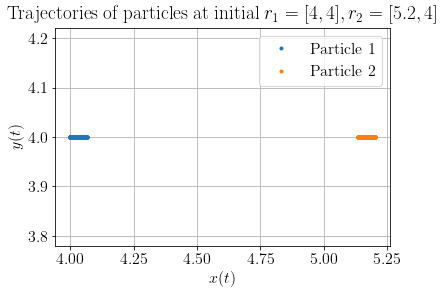

In [6]:
r1=np.array([4,4],float) # initial positions
r2=np.array([5.2,4],float)
v1=np.array([0,0],float) # initial velocities
v2=np.array([0,0],float)

# Call function above to solve ODE using Verlet Method
# using the values specified above
r1pts,r2pts,v1pts,v2pts = Verlet(LennardJonesEOM,tpts,r1,r2,v1,v2)

# Plot the result
plt.plot(*zip(*r1pts),'.',label = 'Particle 1')
plt.plot(*zip(*r2pts),'.',label = 'Particle 2')
plt.title(r'Trajectories of particles at initial $r_1=[4,4],r_2=[5.2,4]$')
plt.xlabel(r"$x(t)$")
plt.ylabel(r'$y(t)$')
plt.legend()
plt.grid(True)
plt.show()

The result is a little bit hard to see, so just to make sure we don't have nonsense, let's plot the trajectory of just one particle. To better visualize the motion, we will plot the motion of just the $x$ position with respect to time (the particles are contrained to move in 1 dimension anyway!)

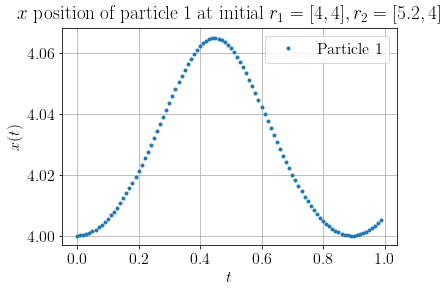

In [7]:
# Plot the trajectory of Particle 1
xpts, ypts = zip(*r1pts)
tpts
plt.plot(tpts,xpts,'.',label = 'Particle 1')
plt.title(r'$x$ position of particle 1 at initial $r_1=[4,4],r_2=[5.2,4]$')
plt.xlabel(r"$t$")
plt.ylabel(r'$x(t)$')
plt.legend()
plt.grid(True)
plt.show()

Using this information we are able to make sense of the first graph. What we are seeing is an oscillating system! The two particles are initially attracted, and then repelled again. That is why the first graph looks like a straight line, the particle returns along the same path. We discuss this in more detail in Part C.

## Second Initial Condition: (Repulsion)

i) $\mathbf{r_1}=[4.5,4]$, $\mathbf{r_2}=[5.2,4]$

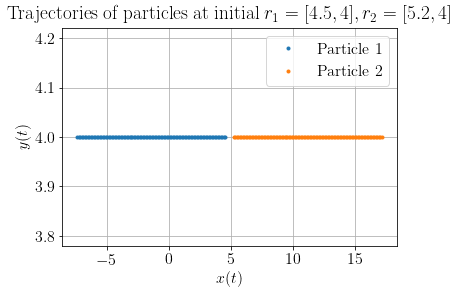

In [8]:
r1=np.array([4.5,4],float) # initial positions
r2=np.array([5.2,4],float)
v1=np.array([0,0],float) # initial velocities
v2=np.array([0,0],float)

# Call function above to solve ODE using Verlet Method
# using the values specified above
r1pts,r2pts,v1pts,v2pts = Verlet(LennardJonesEOM,tpts,r1,r2,v1,v2)

# Plot the result
plt.plot(*zip(*r1pts),'.',label = 'Particle 1')
plt.plot(*zip(*r2pts),'.',label = 'Particle 2')
plt.title(r'Trajectories of particles at initial $r_1=[4.5,4],r_2=[5.2,4]$')
plt.xlabel(r"$x(t)$")
plt.ylabel(r'$y(t)$')
plt.legend()
plt.grid(True)
plt.show()

The only difference in this scenario is that the particles are starting closer together. In this scenario we do not see the initial attraction, but instead the particles are very quickly accelerated away from each other because the repulsive force is extremely strong. This is again demonstrated by the $x$ position with respect to time plot shown below. The particle is accelerated away much quicker than in the first example.

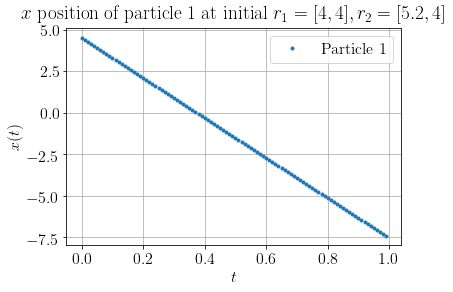

In [9]:
# Plot the trajectory of Particle 1
xpts, ypts = zip(*r1pts)
tpts
plt.plot(tpts,xpts,'.',label = 'Particle 1')
plt.title(r'$x$ position of particle 1 at initial $r_1=[4,4],r_2=[5.2,4]$')
plt.xlabel(r"$t$")
plt.ylabel(r'$x(t)$')
plt.legend()
plt.grid(True)
plt.show()

## Third Initial Condition: (Attraction)

i) $\mathbf{r_1}=[2,3]$, $\mathbf{r_2}=[3.5,4.4]$

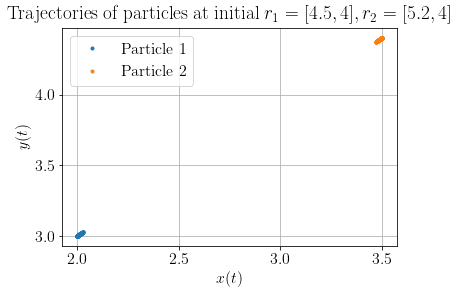

In [10]:
r1=np.array([2,3],float) # initial positions
r2=np.array([3.5,4.4],float)
v1=np.array([0,0],float) # initial velocities
v2=np.array([0,0],float)

# Call function above to solve ODE using Verlet Method
# using the values specified above
r1pts,r2pts,v1pts,v2pts = Verlet(LennardJonesEOM,tpts,r1,r2,v1,v2)

# Plot the result
plt.plot(*zip(*r1pts),'.',label = 'Particle 1')
plt.plot(*zip(*r2pts),'.',label = 'Particle 2')
plt.title(r'Trajectories of particles at initial $r_1=[4.5,4],r_2=[5.2,4]$')
plt.xlabel(r"$x(t)$")
plt.ylabel(r'$y(t)$')
plt.legend()
plt.grid(True)
plt.show()

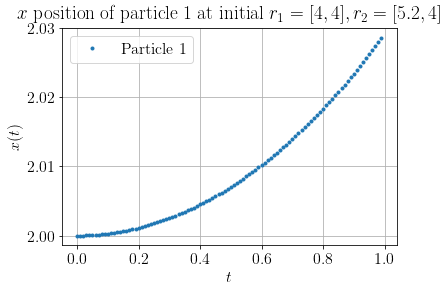

In [11]:
# Plot the trajectory of Particle 1
xpts, ypts = zip(*r1pts)
tpts
plt.plot(tpts,xpts,'.',label = 'Particle 1')
plt.title(r'$x$ position of particle 1 at initial $r_1=[4,4],r_2=[5.2,4]$')
plt.xlabel(r"$t$")
plt.ylabel(r'$x(t)$')
plt.legend()
plt.grid(True)
plt.show()

We now see the third possibility, when the particles start far away from each other. In this scenario the particles do not accelerate away from each other, but instead begin to move towards each other. We are also now no longer contrained to move along only the x axis, but rather on a diagonal line going through the initial starting points.

# Part C

The Lennard-Jones potential has two parts, an attractive potential and a repulsive potential. The repulsive potential is proportional to $\frac{1}{r^{12}}$ wheras the attractive term is proportional to $\frac{1}{r^{6}}$. The exponents mean that the attractive term dominates at large $r$, wheras the repulsive term dominates for small $r$. In the previous section we explored 3 distinct possibilities. The third scenario depicted us placing the particles far away from each other. Here the attractive term pulls the particles together. If we were to let the code run for a longer period of time, we would eventually reach a point in which the repulsive term takes over and the particles are repelled again. This is in contrast to the second scenario, where the particles started very close to each other. In this scenario the inital potential was huge. As the particles were accelerated away from each other, this huge potential energy was transformed into large amaounts of kinetic energy. This allowed the particles to continue to travel away from each other at high speeds despite the fact that they entered regimes where the attractive term began to dominate again. In fact, it is very possible to start the particles at a small enough separation such that the initial potential energy that is later turned into kinetic energy is sufficiently large to send the particles to infinity with no possibility of returning. This is akin to the Earth's escape velocity.

The first scenario is the nice ''sweet spot'' that falls just in the middle. The physics is very similar to a pendulum or a harmonic oscillator, where there is a continual back-and forth trade-off between potential and kinetic energies. At a very special $r$, the attractive and repulsive terms are on the same order, and so the potential energy from one is turned into a kinetic energy, which is soon overpowered by the opposing potential energy, and thus gains kinetic energy in the opposing direction. This constant tradeoff between the two is what gives us the oscillating motion. It's first year physics really, just in a fancier context.